# Question (9)

* Bluring the background is the task here.

In [1]:
#Import the necessary libraries  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

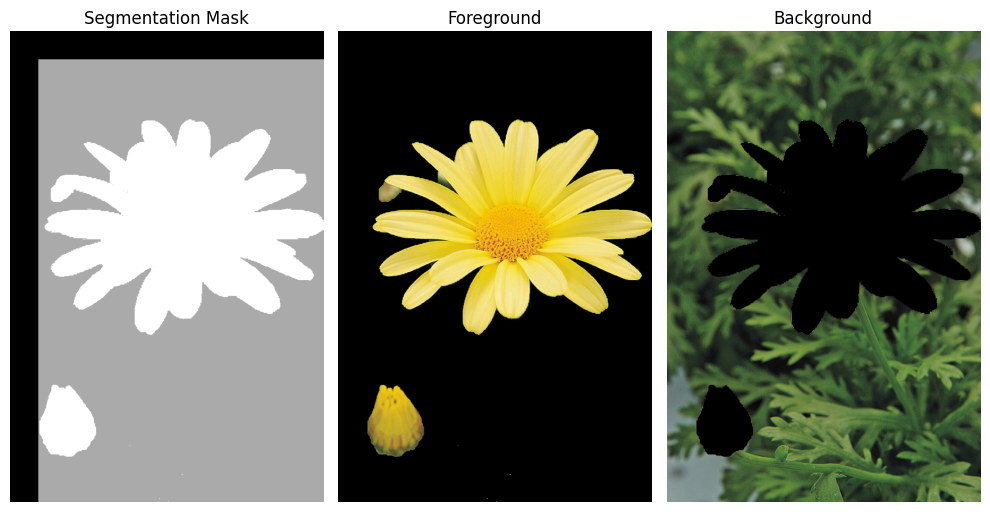

In [2]:
# Load the image
image = cv.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/Q9.png',cv.IMREAD_COLOR)

# Create a mask for the foreground and background
mask = np.zeros(image.shape[:2], np.uint8)

# Define rectangle for initial segmentation (format: (start_x, start_y, width, height))
rect = (50, 50, 40000, 8000)

# Initialize the background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask to separate foreground and background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Create segmented images
foreground = image * mask2[:, :, np.newaxis]
background = image * (1 - mask2[:, :, np.newaxis])

# Display results
plt.figure(figsize=(10, 8))

plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.title('Background')
plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
# Create a copy of the original image for the enhanced image
enhanced_image = image.copy()

# Apply Gaussian blur to the background
blurred_background = cv.GaussianBlur(background, (21, 21), sigmaX=30)

# Replace the background of the enhanced image with the blurred background
enhanced_image[np.where(mask2 == 0)] = blurred_background[np.where(mask2 == 0)]

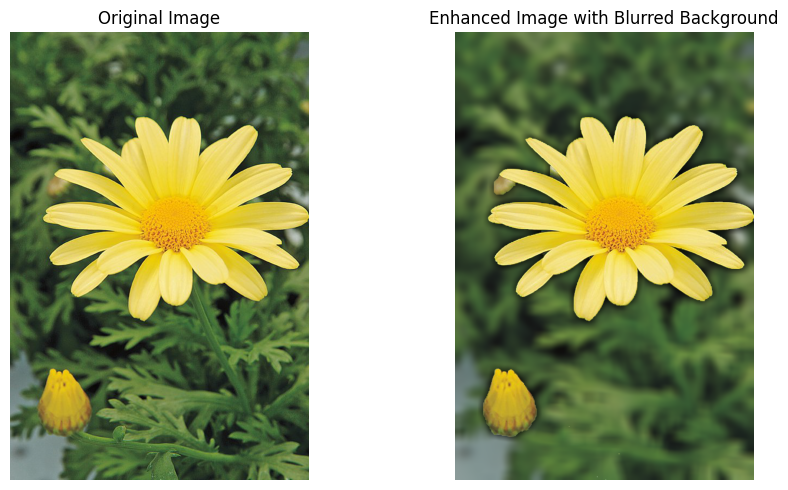

In [4]:
# Display the original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.title('Enhanced Image with Blurred Background')
plt.axis('off')

plt.tight_layout()
plt.show()


## Reference Codes

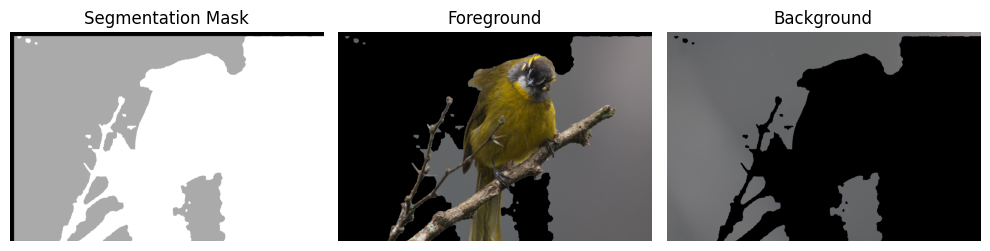

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/c.jpg',cv2.IMREAD_COLOR)

# Create a mask for the foreground and background
mask = np.zeros(image.shape[:2], np.uint8)

# Define rectangle for initial segmentation (format: (start_x, start_y, width, height))
rect = (50, 50, 40000, 8000)

# Initialize the background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to separate foreground and background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Create segmented images
foreground = image * mask2[:, :, np.newaxis]
background = image * (1 - mask2[:, :, np.newaxis])

# Display results
plt.figure(figsize=(10, 8))

plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title('Background')
plt.axis('off')

plt.tight_layout()
plt.show()


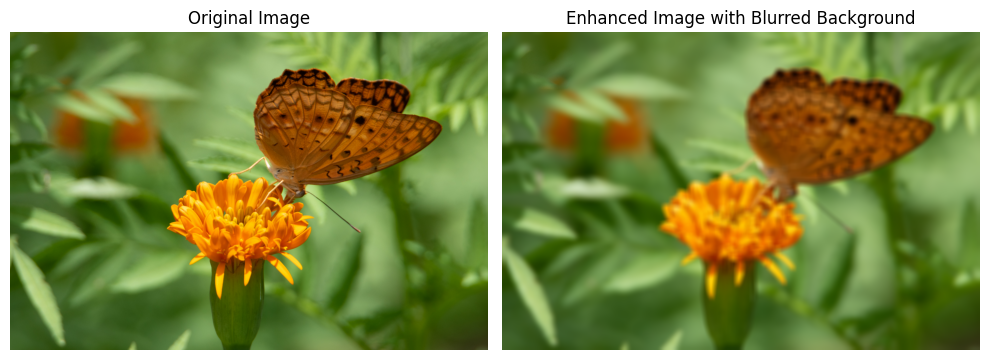

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/bg_fg.jpg',cv2.IMREAD_COLOR)

# Create a mask for the foreground and background
mask = np.zeros(image.shape[:2], np.uint8)

# Define rectangle for initial segmentation (format: (start_x, start_y, width, height))
rect = (50, 50, 200, 150)

# Initialize the background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to separate foreground and background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Create a copy of the original image for the enhanced image
enhanced_image = image.copy()

# Apply Gaussian blur to the background
blurred_background = cv2.GaussianBlur(image, (21, 21), sigmaX=30)
enhanced_image[np.where(mask2 == 0)] = blurred_background[np.where(mask2 == 0)]

# Display the original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image with Blurred Background')
plt.axis('off')

plt.tight_layout()
plt.show()
